intro:
    
This dataset contains house sale prices for King County, which includes Seattle.
It includes homes sold between May 2014 and May 2015.
The dataset is pretty unbalanced with wide range of houses information that are built and renovated from the year 1990 to 2015.

The goal is to predict the price category of a house that a realtor can charge, or a customer can invest to buy a house by considering multiple input factors.

id: This is unique identification number given to each house in the dataset.

date: This is the date the house is added into the dataset and is in the format YYYY-MM-DD.

price: (Numerical) Price of each house in US dollars.

bedrooms: (Numerical) Number of bed rooms available in each house and the dataset has houses having number of bedrooms ranging from 0 to 33.

bathrooms: (Numerical) Number of bed rooms available in each house and the dataset has houses having number of bedrooms ranging from 0 to 8.

sqft_living: (Numerical) Area size of living room in square feet.

sqft_lot: (Numerical) Total area of size of lot in square feet.

floors: (Numerical) Number of floors available in house.

waterfront: (Boolean 0/1) This is an indicator if the house is located on or beside a lake or beach. Possible values are 0 – indicating No and 1 – indicating Yes.

view: (Numerical) Rating of view of city or lake or beach from house and is rated from 0 to 5.

condition: (Numerical) Overall condition of house rated in the range 1 to 5.

grade: (Numerical) Overall grade of house ranging from 1 to 12.

sqft_above: (Numerical) The surface area of house in square feet above ground level.

sqft_basement: (Numerical) The surface area of house in square feet below ground level or basement.

yr_built: (Numerical) The year of house in which it is constructed.

yr_renovated: (Numerical) Year in which house is renovated or remodeled.

zipcode: (Categorical) It is a 5 digit zip code in which the house is located.

lat: (Numerical) Geographical Latitude position of the house.

long: (Numerical) Geographical longitude position of the house.

sqft_living15: (Numerical) It is the average house square footage of the 15 closest houses.

sqft_lot15: (Numerical) It is the average lot square footage of the 15 closest houses.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('housing2.csv')
df.head()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,1,3.0,1.00,1180,5650.0,1.0,0,0.0,...,7,1180.0,0.0,1955,0.0,98178,47.467850,-118.442548,1340.0,5650
1,6.414100e+09,20141209T000000,3,3.0,2.25,2570,7242.0,2.0,0,0.0,...,7,2170.0,400.0,1951,1991.0,98125,47.739287,-118.556787,1690.0,7639
2,5.631500e+09,20150225T000000,1,2.0,1.00,770,10000.0,1.0,0,0.0,...,6,770.0,0.0,1933,0.0,98028,47.576516,-119.427920,2720.0,8062
3,2.487201e+09,20141209T000000,4,4.0,3.00,1960,5000.0,1.0,0,0.0,...,7,1050.0,910.0,1965,NaN,98136,47.520418,-118.599666,1360.0,5000
4,1.954401e+09,20150218T000000,3,3.0,2.00,1680,8080.0,1.0,0,0.0,...,8,1680.0,0.0,1987,0.0,98074,47.717942,-118.418335,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,20140521T000000,2,3.0,2.50,1530,1131.0,3.0,0,0.0,...,8,1530.0,0.0,2009,0.0,98103,47.843378,-117.969003,1530.0,1509
21609,6.600060e+09,20150223T000000,3,4.0,2.50,2310,5813.0,2.0,0,0.0,...,8,2310.0,0.0,2014,0.0,98146,47.748003,-117.697733,1830.0,7200
21610,1.523300e+09,20140623T000000,3,2.0,0.75,1020,1350.0,2.0,0,0.0,...,7,1020.0,0.0,2009,0.0,98144,47.244265,-118.015665,1020.0,2007
21611,2.913101e+08,20150116T000000,3,3.0,2.50,1600,2388.0,2.0,0,0.0,...,8,1600.0,0.0,2004,0.0,98027,47.561359,-117.640371,1410.0,1287


************

In [2]:
df.shape

(21613, 21)

The size of the dataset is bulit from 21 columns and 21613 rows.

Reordeing the dataset with ascending id value starts from 1. The reason for the change is that there are more than 2000 id's missing therefor i am replacing the id.

In [4]:
df = df.drop(['id'], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,1,3.0,1.00,1180,5650.0,1.0,0,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.467850,-118.442548,1340.0,5650
1,2014-12-09,3,3.0,2.25,2570,7242.0,2.0,0,0.0,3,7,2170.0,400.0,1951,1991.0,98125,47.739287,-118.556787,1690.0,7639
2,2015-02-25,1,2.0,1.00,770,10000.0,1.0,0,0.0,3,6,770.0,0.0,1933,0.0,98028,47.576516,-119.427920,2720.0,8062
3,2014-12-09,4,4.0,3.00,1960,5000.0,1.0,0,0.0,5,7,1050.0,910.0,1965,NaN,98136,47.520418,-118.599666,1360.0,5000
4,2015-02-18,3,3.0,2.00,1680,8080.0,1.0,0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.717942,-118.418335,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,2,3.0,2.50,1530,1131.0,3.0,0,0.0,3,8,1530.0,0.0,2009,0.0,98103,47.843378,-117.969003,1530.0,1509
21609,2015-02-23,3,4.0,2.50,2310,5813.0,2.0,0,0.0,3,8,2310.0,0.0,2014,0.0,98146,47.748003,-117.697733,1830.0,7200
21610,2014-06-23,3,2.0,0.75,1020,1350.0,2.0,0,0.0,3,7,1020.0,0.0,2009,0.0,98144,47.244265,-118.015665,1020.0,2007
21611,2015-01-16,3,3.0,2.50,1600,2388.0,2.0,0,0.0,3,8,1600.0,0.0,2004,0.0,98027,47.561359,-117.640371,1410.0,1287


All of the dates formatted with hour as well. The hour format is set to 000000 in all of the dates, therefore i changed the format of the dates.

In [3]:
df['date'] = pd.to_datetime(df['date'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,2014-10-13,1,3.0,1.00,1180,5650.0,1.0,0,0.0,...,7,1180.0,0.0,1955,0.0,98178,47.467850,-118.442548,1340.0,5650
1,6.414100e+09,2014-12-09,3,3.0,2.25,2570,7242.0,2.0,0,0.0,...,7,2170.0,400.0,1951,1991.0,98125,47.739287,-118.556787,1690.0,7639
2,5.631500e+09,2015-02-25,1,2.0,1.00,770,10000.0,1.0,0,0.0,...,6,770.0,0.0,1933,0.0,98028,47.576516,-119.427920,2720.0,8062
3,2.487201e+09,2014-12-09,4,4.0,3.00,1960,5000.0,1.0,0,0.0,...,7,1050.0,910.0,1965,NaN,98136,47.520418,-118.599666,1360.0,5000
4,1.954401e+09,2015-02-18,3,3.0,2.00,1680,8080.0,1.0,0,0.0,...,8,1680.0,0.0,1987,0.0,98074,47.717942,-118.418335,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,2014-05-21,2,3.0,2.50,1530,1131.0,3.0,0,0.0,...,8,1530.0,0.0,2009,0.0,98103,47.843378,-117.969003,1530.0,1509
21609,6.600060e+09,2015-02-23,3,4.0,2.50,2310,5813.0,2.0,0,0.0,...,8,2310.0,0.0,2014,0.0,98146,47.748003,-117.697733,1830.0,7200
21610,1.523300e+09,2014-06-23,3,2.0,0.75,1020,1350.0,2.0,0,0.0,...,7,1020.0,0.0,2009,0.0,98144,47.244265,-118.015665,1020.0,2007
21611,2.913101e+08,2015-01-16,3,3.0,2.50,1600,2388.0,2.0,0,0.0,...,8,1600.0,0.0,2004,0.0,98027,47.561359,-117.640371,1410.0,1287


In [5]:
df = df.dropna()

all rows who contains empty cells or nan are erased in order to perform a full data set with no missing data.

In [7]:
df.shape

(15219, 20)

we can see that the dataset idf['sqft_lot'] = df['sqft_lot'].astype('int64')s smaller than before. the amount of data is now biult out of 20 columns + id and 15219 rows

In [8]:
df.describe(include="all")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15219,15219.000000,15219.000000,15219.000000,15219.000000,1.521900e+04,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000,15219.000000
unique,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.924042,3.366121,2.111177,2079.447993,1.494103e+04,1.492838,0.007359,0.232013,3.409685,7.654248,1787.988041,291.459951,1970.999737,84.846968,98078.132203,47.577392,-118.215507,1984.144030,12699.399304
std,NaN,1.113785,0.931057,0.767837,915.655837,4.125144e+04,0.538059,0.085472,0.761721,0.654182,1.174617,827.845655,441.453629,29.288207,402.691465,53.621637,0.769474,1.011672,683.667348,27455.669663
min,NaN,1.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,46.654299,-121.744927,399.000000,651.000000
25%,NaN,2.000000,3.000000,1.500000,1430.000000,5.060000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.398272,-118.896171,1480.000000,5109.500000


In [9]:
df['sqft_lot'] = df['sqft_lot'].map(int).round()
# pd.set_option('display.float_format', '{:.2f}'.format)
# df["sqft_lot"] = pd.to_numeric(df["sqft_lot"])
# df['sqft_lot'] = df['sqft_lot'].astype('float').round()



according to the table above we can see that the price mean and std are relatively close, that means that the prices Distributed widely. Same on the bedrooms, bathrooms, floors, condition, grade, sqft_above, all those columns mean and std are close to eachother, that meaning of that is that the data distributed widely. 

On sqft_living and sqft_living15 the std is much smaller than the std. the meaning of that is that most of the data was around the average.

On sqft_lot, waterfront, view, sqft_basement, sqft_lot15 the mean is smaller than the std. the meaning of that is that most of the values are around the average but there are some high values which pulls the std up.

zipcode, yr_built, yr_renovated, lat and long are columns which their values are not relevant to that moment because that the values of those columns represent locations and years. the data which we get out of it is not data we can rely on.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15219 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15219 non-null  datetime64[ns]
 1   price          15219 non-null  int64         
 2   bedrooms       15219 non-null  float64       
 3   bathrooms      15219 non-null  float64       
 4   sqft_living    15219 non-null  int64         
 5   sqft_lot       15219 non-null  int64         
 6   floors         15219 non-null  float64       
 7   waterfront     15219 non-null  int64         
 8   view           15219 non-null  float64       
 9   condition      15219 non-null  int64         
 10  grade          15219 non-null  int64         
 11  sqft_above     15219 non-null  float64       
 12  sqft_basement  15219 non-null  float64       
 13  yr_built       15219 non-null  int64         
 14  yr_renovated   15219 non-null  float64       
 15  zipcode        1521

<AxesSubplot:>

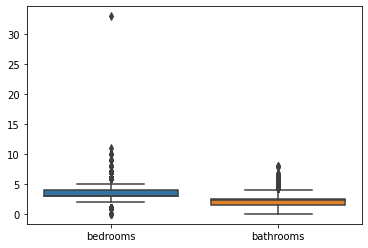

In [11]:
sns.boxplot(data=df[['bedrooms','bathrooms']])

We can see that the data is in the range of 0 - 33 and not leaking out of boundries, and we can also notice that the bathrooms are also within the limits of 0-8.

<AxesSubplot:>

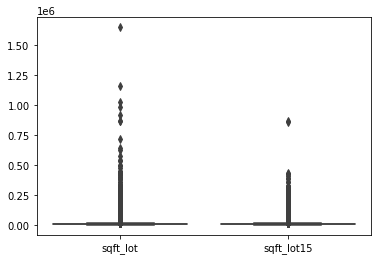

In [12]:
sns.boxplot(data=df[['sqft_lot', 'sqft_lot15']])

Total area of size of lot in square feet in comapre to the average lot square footage of the 15 closest houses.

<AxesSubplot:>

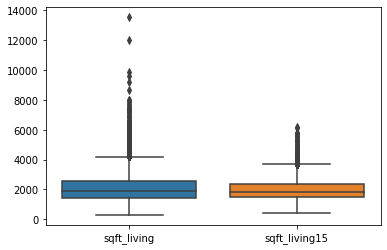

In [13]:
sns.boxplot(data=df[['sqft_living', 'sqft_living15']])

Total area of size of house in square feet in comapre to the average house square footage of the 15 closest houses. we can also notice that the outliers are at the top side.

<AxesSubplot:>

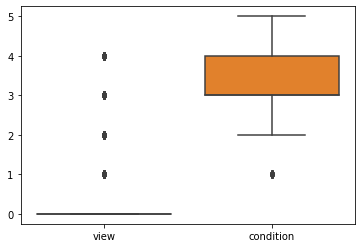

In [14]:
sns.boxplot(data=df[['view', 'condition']])

We can see that most of the houses who are in condition between 3-4 are also the houses with the highest views.

<AxesSubplot:>

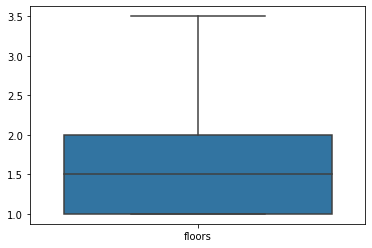

In [15]:
sns.boxplot(data=df[['floors']])

In [16]:
We can notice that most houses are between 1-2 floors.

SyntaxError: invalid syntax (<ipython-input-16-ef5d0190f435>, line 1)

<AxesSubplot:>

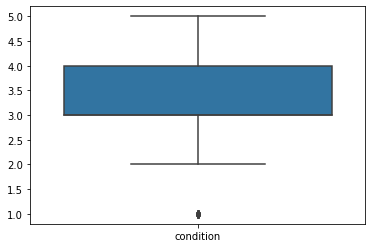

In [17]:
sns.boxplot(data=df[['condition']])

We can notice that most houses are in good condition between 3-4 with otiliers which are in worse condition.

<AxesSubplot:>

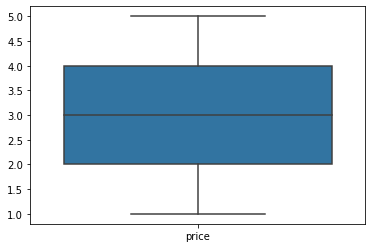

In [18]:
sns.boxplot(data=df[['price']])

We can understand that most houses around the housing list area are listed around 2-4 with no outliers.

<AxesSubplot:>

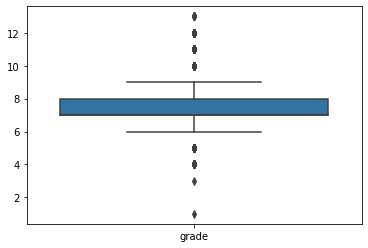

In [19]:
sns.boxplot(data=df[['grade']])

we can understand that most of the houses are rated between 7 to 8. with quite similar outliers distibution on both sides of 

In [21]:
# df['grade'].max()
df[df['grade'] > 12]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4411,2014-08-04,5,5.0,5.75,9200,35069,2.0,0,0.0,3,13,6200.0,3000.0,2001,0.0,98039,47.325450,-117.576277,3560.0,24345
5451,2014-10-10,5,4.0,3.25,4890,13402,2.0,0,0.0,3,13,4890.0,0.0,2004,0.0,98059,47.759333,-120.168191,5790.0,13539
6041,2014-11-20,5,4.0,4.00,6330,13296,2.0,0,2.0,3,13,4900.0,1430.0,2000,0.0,98033,48.017014,-118.878566,2200.0,9196
7252,2014-10-13,5,6.0,8.00,12050,27600,2.5,0,3.0,4,13,8570.0,3480.0,1910,1987.0,98102,47.417543,-118.967678,3940.0,8800
7907,2014-09-23,5,6.0,5.00,7100,18200,2.5,0,0.0,3,13,5240.0,1860.0,1933,2002.0,98199,47.446395,-117.980592,3130.0,6477
9254,2014-09-19,5,6.0,7.75,9890,31374,2.0,0,4.0,3,13,8860.0,1030.0,2001,0.0,98039,47.572020,-118.278324,4540.0,42730
10373,2014-12-12,5,5.0,5.50,7400,18898,2.0,0,3.0,3,13,6290.0,1110.0,2001,0.0,98006,47.683831,-119.472508,6110.0,26442
13700,2015-04-20,5,4.0,2.50,4500,35200,1.0,0,0.0,3,13,4500.0,0.0,1988,0.0,98006,47.388353,-116.975613,4760.0,35200
14556,2014-06-11,5,5.0,6.25,8670,64033,2.0,0,4.0,3,13,6120.0,2550.0,1965,2003.0,98177,47.710461,-119.190640,4140.0,81021


We are able to see here that there are 9 rows with grade higher than the maximum grade available.
therefor i'm going to change them to 12.

In [30]:
df['grade'] = np.where(df['grade'] > 12, 12, df['grade']) 

<AxesSubplot:>

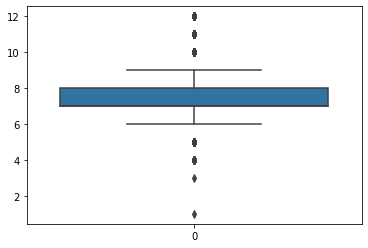

In [31]:
sns.boxplot(data=df['grade'])

After replacing all of the outliers values with leagal once we can see that the boxplot values are all in range

Summary:

In this section i have done a few actoins and manipulations on the csv file.

at the beggining after opening the file, i have noticed that there are many rows who has NaN vlaues or empty cells. 
because of the fact that every one of this houses is differnet than the other, and because every detail about a house who's for sale must be
accurate i had to drop lines who has missing details in order not to mistake on houses details.
 
The id's who came with the houses were also missing in part of the rows, therefore i decided to replace them with ascending order id's from 1 and up.
this way i saved rows with missing id's from beeing deleted.

The date format was 20141013T000000	and from looking into the file i have noticed that all of the time column was set to T000000, due to that i 
replaced the time format to 2014-10-13.

On the next step i created boxplots of most of the features trying to find any mistakes or insights about the data. 

*on the bedroom and bathroom boxplot i have noticed that the data in the plot are in the bounds of the leagal data,

and also that in the bethroom data the outliers are indicates on homes with more than 5 bathrooms.
The bedroom data shows that there are outliers who indicates on houses with 0 rooms and more with more then 5.

*on the sqft_living and sqft_living15 boxplot i have noticed that both average value was on 2000 but on the sqft_living data 
the outliers were much highers than those of the 15 closest houses.

*on the sqft_lot and sqft_lot15 boxplot i have noticed that both average value was on 2000 but on the sqft_lot data 
the outliers were much highers than those of the 15 closest houses.

*On the grade data the grade supposed to be between 0-12. in the boxplot i have noticed that there are outliers who are higher than 12.
after checking for grades higher than 12 i found 9 rows with grade=13. after changing it back to 12 the boxplot was with valid values only.
